# Practical Task 2

Read diabetes_dirty.csv

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Import, read and display first 5 columns of the dataset
data = pd.read_csv("diabetes_dirty.csv")
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Differentiate between the independent variables and the dependent variable, and assign them to variables X and Y. Age, BMI and BP are independent variables, whereas POGRESSION is a dependant variable.

X = Age, BMI, BP

Y = PROGRESSION

In [140]:
# Assign the first, third and fourth column to x
X = data.iloc[:,[0, 2, 3]].values
X[1:4]
# Assign the 11th column to y
y = data.iloc[:,10].values

Generate training and test sets comprising 80% and 20% of the data respectively.

In [141]:
# Random seed to ensure reproducibility
rseed = 23
# Split data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=rseed)
# Display the shape of the training set
print ("Training data:",X_train.shape, y_train.shape)
# Display the shape of the test set
print ("Test data:",X_test.shape, y_test.shape)

Training data: (353, 3) (353,)
Test data: (89, 3) (89,)


Investigate the necessity for scaling or normalization of the data.

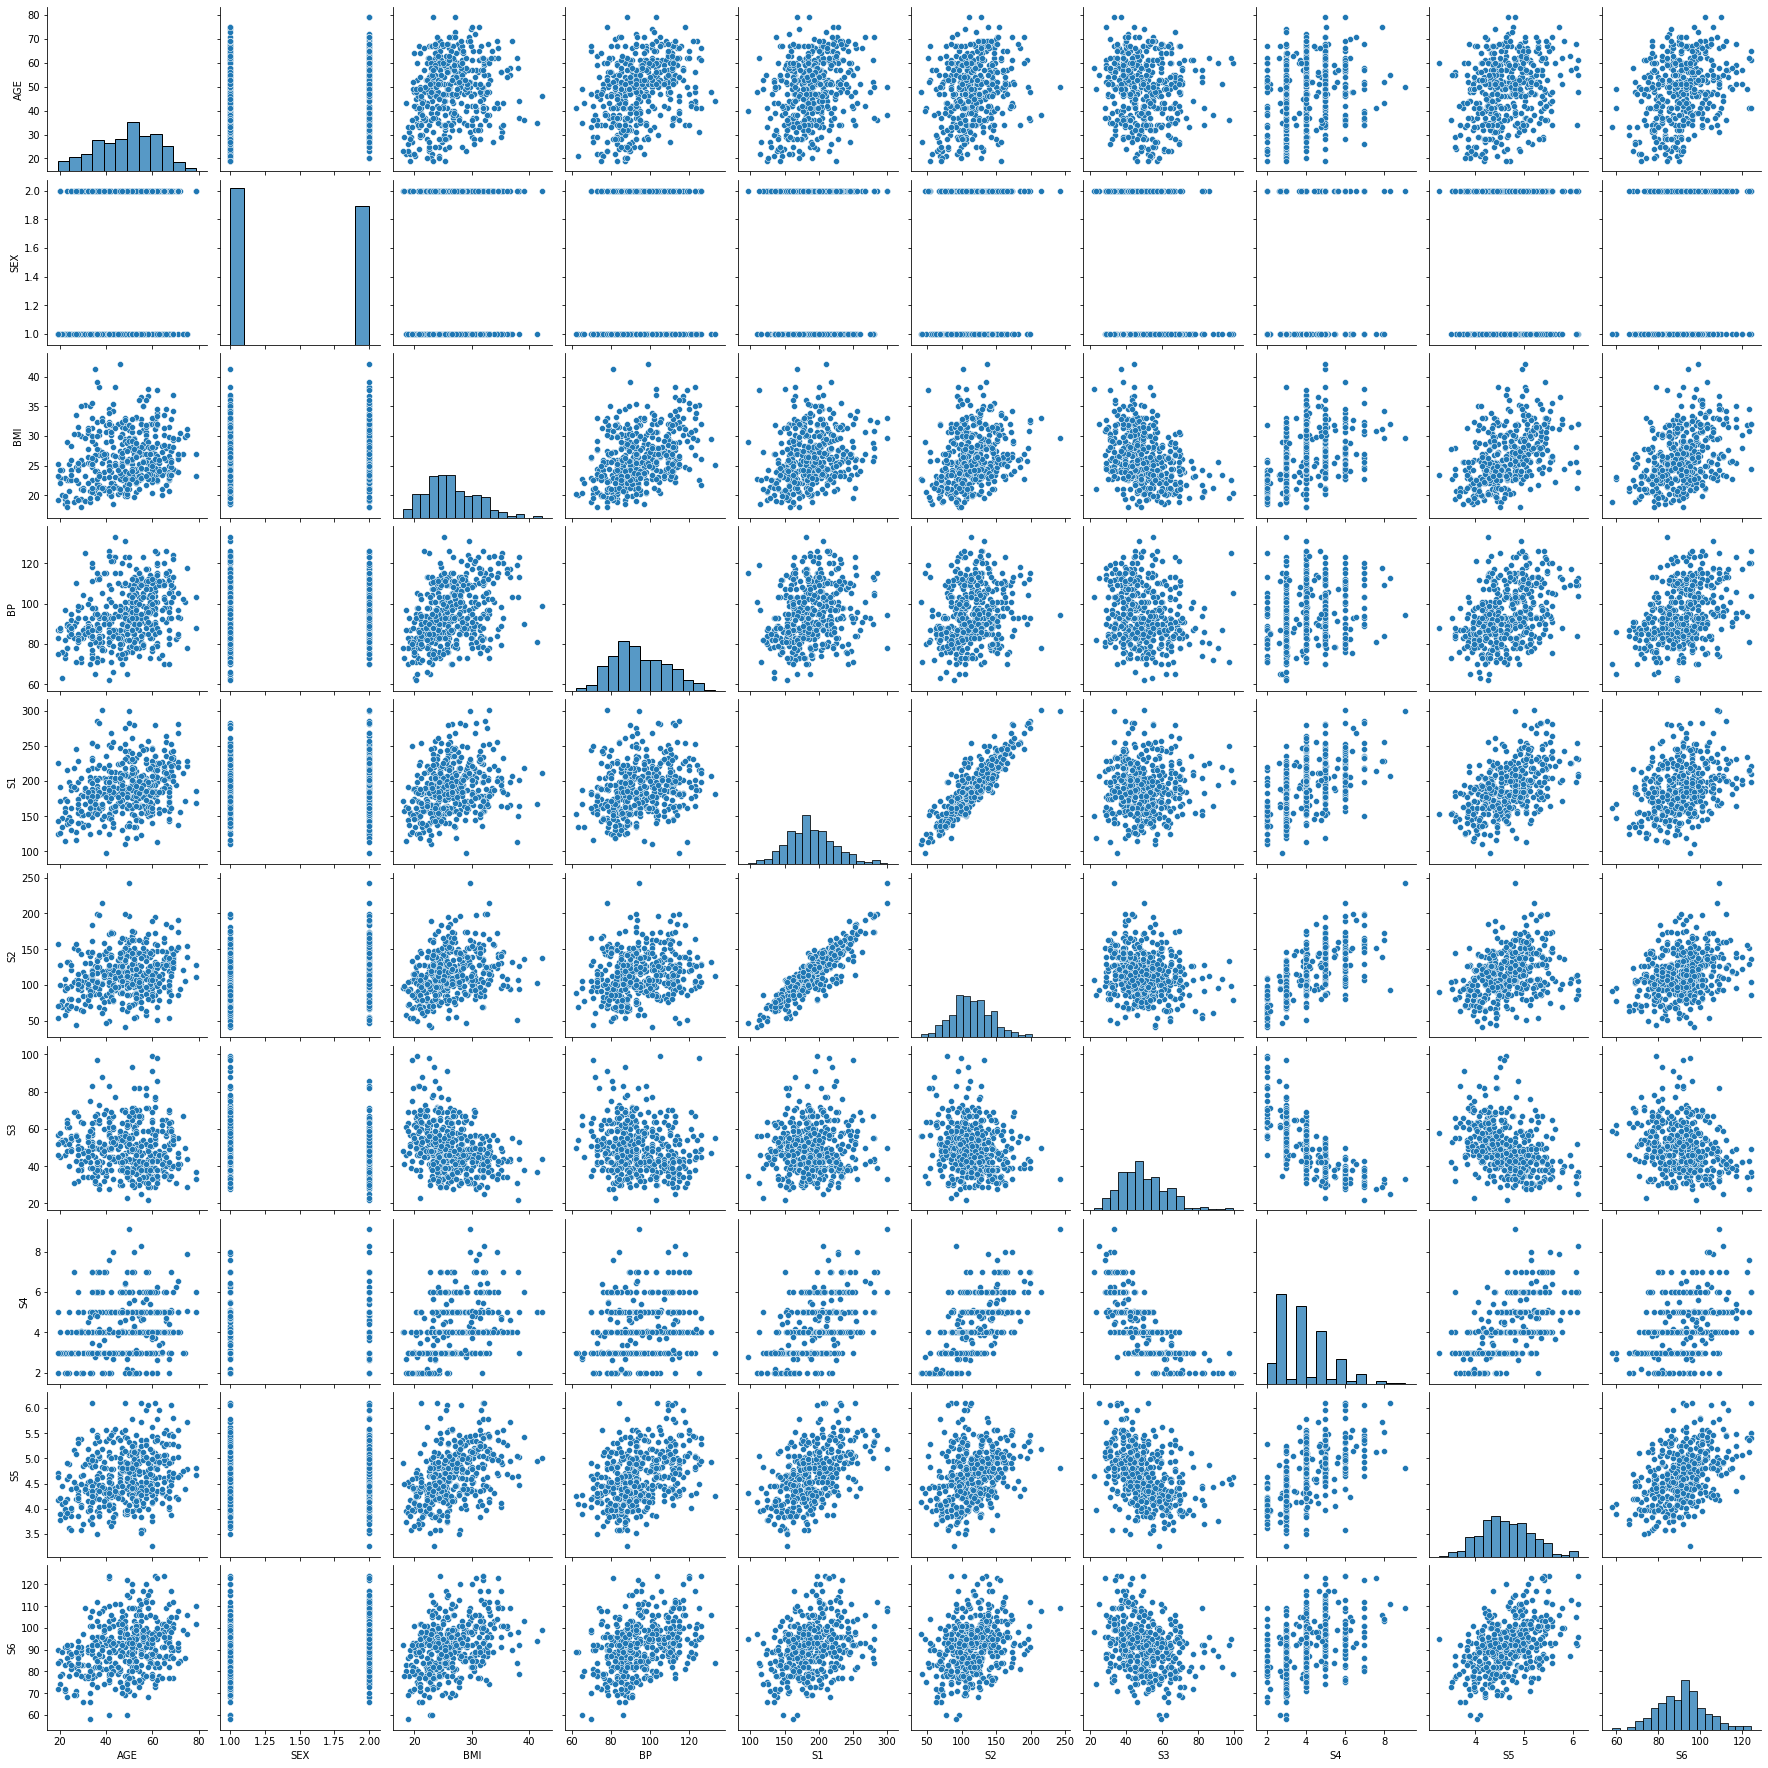

In [142]:
# Creates pairwise scatter plots for the data
sns.pairplot(data=data.drop('PROGRESSION', axis=1))

The features follow a Gaussian distribution, thus normalise data using `StandardScaler`. Fit these scalers on the training set and apply the fitted scalers to transform both the training and test sets accordingly

In [143]:
# Create the StandardScaler object
sc = StandardScaler()
# Fit the scaler on train data
sc.fit(X_train)
# Transform train data
X_train = sc.transform(X_train)
# Transform test data
X_test = sc.transform(X_test)

Generate a multiple linear regression model using the training set. Use all of the independent variables.

Print out the intercept and coefficients of the trained model.

In [144]:
# Create a multiple linear regression model
lm = LinearRegression()
# Fit a multiple linear regression model to the scaled training data
model = lm.fit(X_train, y_train)
# Predict values on the test set
predictions = lm.predict(X_test)
# Create line coordinates for each feature
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
# Hold the predicted values
y_line = lm.predict(X_line)
# Display intercept value of the model
print('Intercept: \n', lm.intercept_)
# Display the coefficients of the model
print('Coefficients: \n', lm.coef_)

Intercept: 
 147.78470254957503
Coefficients: 
 [-0.17012223 37.4107779  19.1476606 ]


Generate predictions for the test set.

In [145]:
# Display first 5 predictions
predictions[0:5]

array([264.50393563, 158.3877987 , 119.56842742, 114.47055454,
       197.82540455])

Compute R-squared for your model on the test set.

In [146]:
# Display R squared score
print ("R2 Score:", round (model.score(X_test, y_test), 4))

R2 Score: 0.3829


Predict a person’s progression in the condition with respect to various attributes about them.


The R2 score is more close to 0 than 1, which suggests that our model doesn't fit our observations quite well.